In [ ]:
# import Functions_Plot

from Functions_Plot import plt_figure_accuracy
print(dir(Functions_Plot))            # просмотр содержимого

['K', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'eval_net', 'get_corr', 'ipd', 'load_audio', 'mean_absolute_error', 'mean_squared_error', 'my_f1_score', 'plt', 'plt_figure_accuracy', 'plt_figure_dice_coef', 'plt_figure_f1_score', 'plt_figure_loss', 'plt_figure_mae', 'plt_scatter_pred', 'show_spectre']


# Распознавание рукописных цифр MNIST

In [ ]:
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
#%matplotlib inline 

from tensorflow.keras.datasets import mnist         # Библиотека с базой Mnist
from tensorflow.keras.models import Sequential      # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta       # Подключаем оптимизатор Adam
from tensorflow.keras import utils                  # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image    # Для отрисовки изображения
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing                   # Пакет предварительной обработки данных

from google.colab import files                      #Для загрузки своей картинки
import numpy as np                                  #Библиотека работы с массивами
import matplotlib.pyplot as plt                     #Для отрисовки графиков
from PIL import Image                               #Для отрисовки изображений
import random                                       #Для генерации случайных чисел 
import math                                         # Для округления
import os                                           #Для работы с файлами 
import seaborn as sns



In [ ]:
from google.colab import drive # Подключаем гугл-диск
drive.mount('/content/drive')

Mounted at /content/drive


# Данные для Нейронки

In [ ]:
(x_, y_), (x_test, y_test) = mnist.load_data()

x_train = x_.reshape(x_.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Нормализуем значения пикспелей (от 0 до 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


# Приводим лейблы к формату One Hot
y_train = utils.to_categorical(y_, 10)
y_test = utils.to_categorical(y_test, 10)

print(x_train.shape, y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000, 10)


# Просмотр картинок

In [ ]:
#Выводим для примера картинки по каждому классу
def output_10_numbers(x_, y_):
  fig, axs = plt.subplots(1, 10, figsize=(25, 3))     # Создаем полотно из 10 графиков
  for i in range(10):                                 # Проходим по классам от 0 до 9
    ls_ind = np.where(y_==i)[0]                       # Получаем список из индексов положений класса i в y_train
    ind = random.choice(ls_ind)                       # Случайным образом выбираем из списка индекс
    img = x_[ind]                                     # Выбираем из x_train(ОБУЧЕНИЯ) нужное изображение
    axs[i].imshow(Image.fromarray(img), cmap='gray')  # Отображаем изображение i-ым графиков

  plt.show()

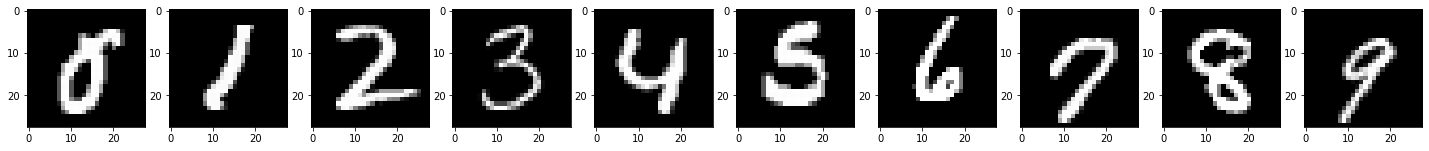

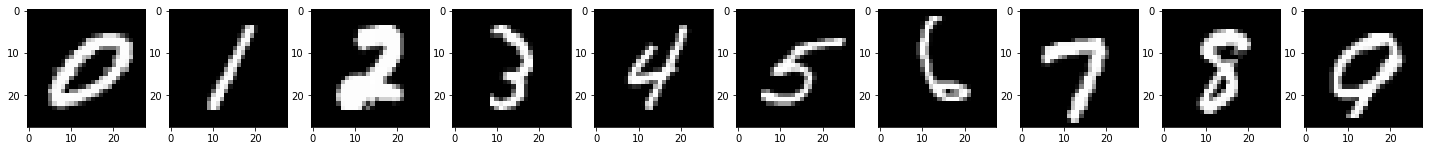

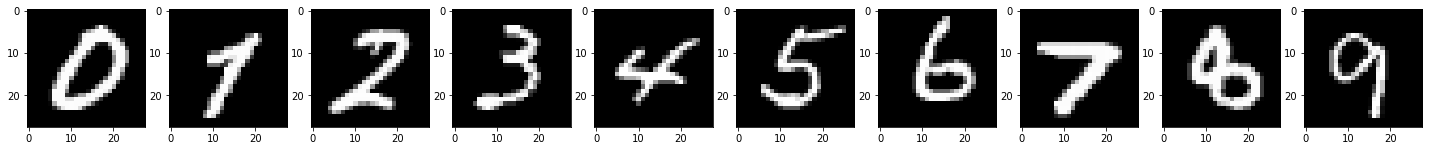

In [ ]:
output_10_numbers(x_, y_)
output_10_numbers(x_, y_)
output_10_numbers(x_, y_)

# Модель 

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer= Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback, Callback, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import os

MODEL_DIR = '/content/'
model_checkpoint = ModelCheckpoint(filepath=os.path.join(MODEL_DIR, 'model.h5'), 
                                   monitor='val_loss',    # monitor='val_loss'
                                   verbose=1, 
                                   save_best_only=True,
                                   save_weights_only=True,
                                   mode='auto')              # mode='auto'

model_checkpoint_accuracy = ModelCheckpoint(filepath=os.path.join(MODEL_DIR, 'model_accuracy.h5'), 
                                   monitor='val_accuracy',    # monitor='val_loss'
                                   verbose=1, 
                                   save_best_only=True,
                                   save_weights_only=True,
                                   mode='max')              # mode='auto'

lr_red = ReduceLROnPlateau(monitor='val_dice_coef',
                           factor=0.1, 
                           patience=15)

In [ ]:

# Обучаем Модель и сохраняем историю
history_ = model.fit(x_train, y_train, 
                      batch_size=128, 
                      epochs=15,
                      validation_split= 0.2, 
                      verbose=1,
                      callbacks=[model_checkpoint, model_checkpoint_accuracy])

Epoch 1/15
373/375 [============================>.] - ETA: 0s - loss: 0.2791 - accuracy: 0.9155
Epoch 1: val_loss improved from inf to 0.06809, saving model to /content/model.h5

Epoch 1: val_accuracy improved from -inf to 0.98117, saving model to /content/model_accuracy.h5
375/375 [==============================] - 15s 10ms/step - loss: 0.2780 - accuracy: 0.9158 - val_loss: 0.0681 - val_accuracy: 0.9812
Epoch 2/15
370/375 [============================>.] - ETA: 0s - loss: 0.0974 - accuracy: 0.9716
Epoch 2: val_loss improved from 0.06809 to 0.04488, saving model to /content/model.h5

Epoch 2: val_accuracy improved from 0.98117 to 0.98742, saving model to /content/model_accuracy.h5
375/375 [==============================] - 3s 9ms/step - loss: 0.0970 - accuracy: 0.9718 - val_loss: 0.0449 - val_accuracy: 0.9874
Epoch 3/15
369/375 [============================>.] - ETA: 0s - loss: 0.0735 - accuracy: 0.9780
Epoch 3: val_loss improved from 0.04488 to 0.04353, saving model to /content/model.

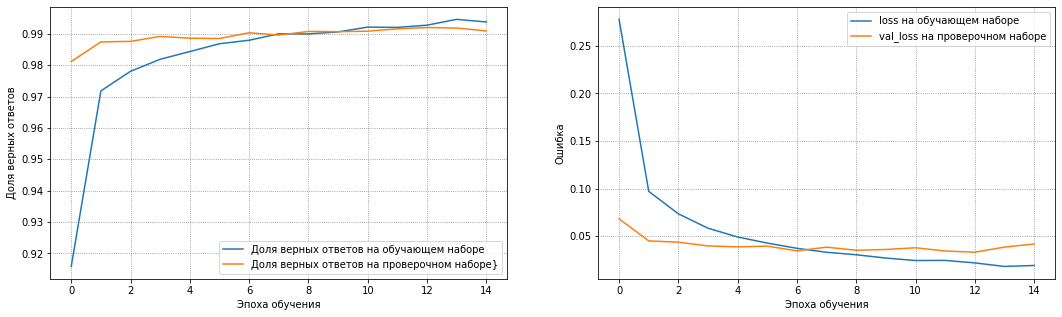

In [ ]:
plt_figure_accuracy(history_)

In [ ]:
model.load_weights('model_accuracy.h5')  # model_accuracy
model.save_weights('/content/drive/MyDrive/Modeli/model_digit_99.h5')

In [ ]:
# Вычисляем результаты сети на тестовом наборе
scores = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0333 - accuracy: 0.9901


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer= Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
# Обучаем Модель и сохраняем историю
history2 = model.fit(x_train, y_train, 
                      batch_size=128, 
                      epochs=15,
                      validation_split= 0.2, 
                      verbose=1,
                      callbacks=[model_checkpoint, model_checkpoint_accuracy])

Epoch 1/15
371/375 [============================>.] - ETA: 0s - loss: 0.0149 - accuracy: 0.9950
Epoch 1: val_loss did not improve from 0.03302

Epoch 1: val_accuracy did not improve from 0.99200
375/375 [==============================] - 4s 10ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0347 - val_accuracy: 0.9919
Epoch 2/15
375/375 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9961
Epoch 2: val_loss did not improve from 0.03302

Epoch 2: val_accuracy improved from 0.99200 to 0.99233, saving model to /content/model_accuracy.h5
375/375 [==============================] - 4s 9ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.0347 - val_accuracy: 0.9923
Epoch 3/15
371/375 [============================>.] - ETA: 0s - loss: 0.0104 - accuracy: 0.9964
Epoch 3: val_loss did not improve from 0.03302

Epoch 3: val_accuracy did not improve from 0.99233
375/375 [==============================] - 4s 10ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 0.

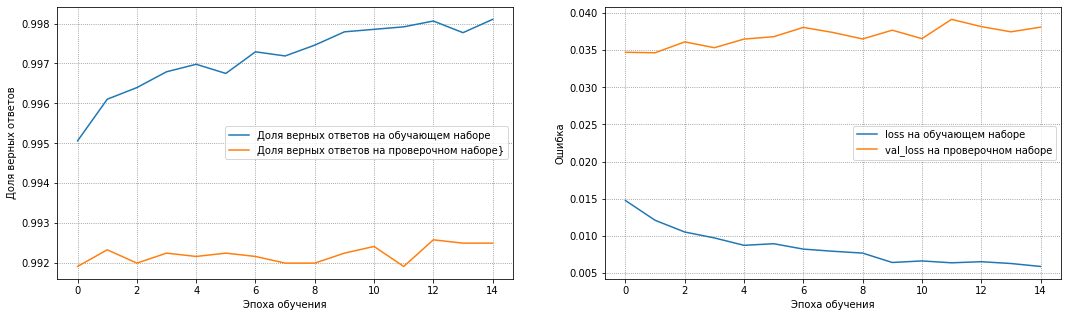

In [ ]:
plt_figure_accuracy(history2)

In [ ]:
model.load_weights('model_accuracy.h5')  # model_accuracy
model.save_weights('/content/drive/MyDrive/Modeli/model_digit_99.3.h5')

# Вычисляем результаты сети на тестовом наборе
scores = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0302 - accuracy: 0.9933


# ЗАГРУЖАЮ СВОЮ КАРТИНКУ

In [ ]:
model.load_weights('/content/drive/MyDrive/Modeli/model_digit_99.3.h5') 

# Вычисляем результаты сети на тестовом наборе
scores = model.evaluate(x_test, y_test)

313/313 [==============================] - 8s 22ms/step - loss: 0.0302 - accuracy: 0.9933


In [ ]:
from google.colab import files 
files.upload()

Saving цифра1.jpg to цифра1.jpg


{'цифра1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x02W\x02\xc6\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x1

In [ ]:
# загружаем картинку в переменную
my_img = image.load_img('цифра1.jpg', target_size=(28, 28), color_mode = 'grayscale')
plt.imshow(my_img)  #Отрисовка картинки
plt.show() # Вывод картинки

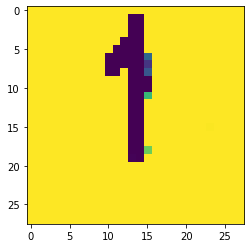

In [ ]:
# загружаем картинку в переменную
path = '/content/drive/My Drive/Базы/цифра_1.jpg'

my_img = image.load_img(path, target_size=(28, 28), color_mode = 'grayscale')
plt.imshow(my_img)  #Отрисовка картинки
plt.show() # Вывод картинки

(28, 28, 1)


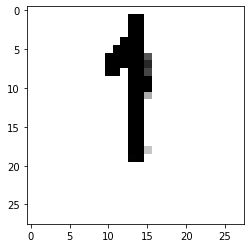

In [ ]:
img1 = image.img_to_array(my_img)  # преобразуем изображение в numpy-массив.
print(img1.shape)

# Отрисовка Массива как картинки (На белом фоне)
plt.imshow(Image.fromarray(img1.reshape((28,28))))
plt.show()


In [ ]:
# решейп массива.
img1 = img1.reshape((1, 28,28))
img1.shape

# Нормализуем входные картинки и Инверсируем 1 - img1, 
# Если Картинку Прдаем на Белом фоне, то нужно Выполнить инверсию цветов, чтоб была на Черном фоне
x_img1 = 1 - (img1.astype('float32') / 255)


Y_img1 = model.predict(x_img1) # Распознаём наш пример
Y_img1.max()

0.9999782

In [ ]:
Y_img1

array([[2.5169342e-11, 9.9997818e-01, 2.1703802e-06, 1.7357254e-07,
        5.2381207e-08, 4.0086738e-09, 1.9270607e-05, 1.5749973e-07,
        1.7101374e-09, 5.4629807e-09]], dtype=float32)

In [ ]:
# Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print('Распознала на картинке цифру :  ',  np.argmax(Y_img1))

# выводим правильный ответ, для сравнения
print('Правильный ответ - Цифра :  1')

Распознала на картинке цифру :   1
Правильный ответ - Цифра :  1


# Печать картинок

In [ ]:
x_.shape

(60000, 784)

In [ ]:
x_[0].max()

1.0

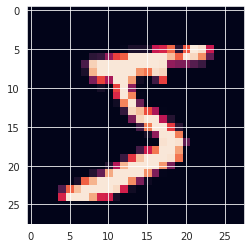

In [ ]:
# Отрисовка Массива как картинки (На белом фоне)
plt.imshow(x_[0].reshape((28,28)))
plt.show()

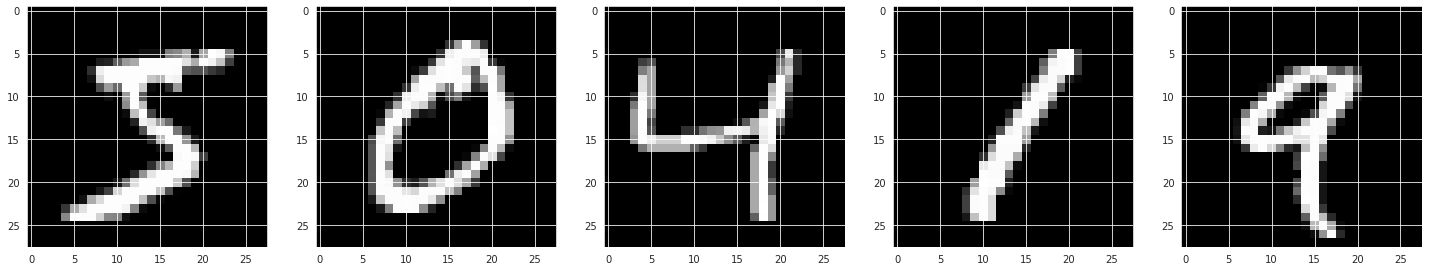

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5)) #Создаем полотно
for i in range(5):
  axs[i].imshow(x_[i].reshape((28,28)), cmap = 'gray')

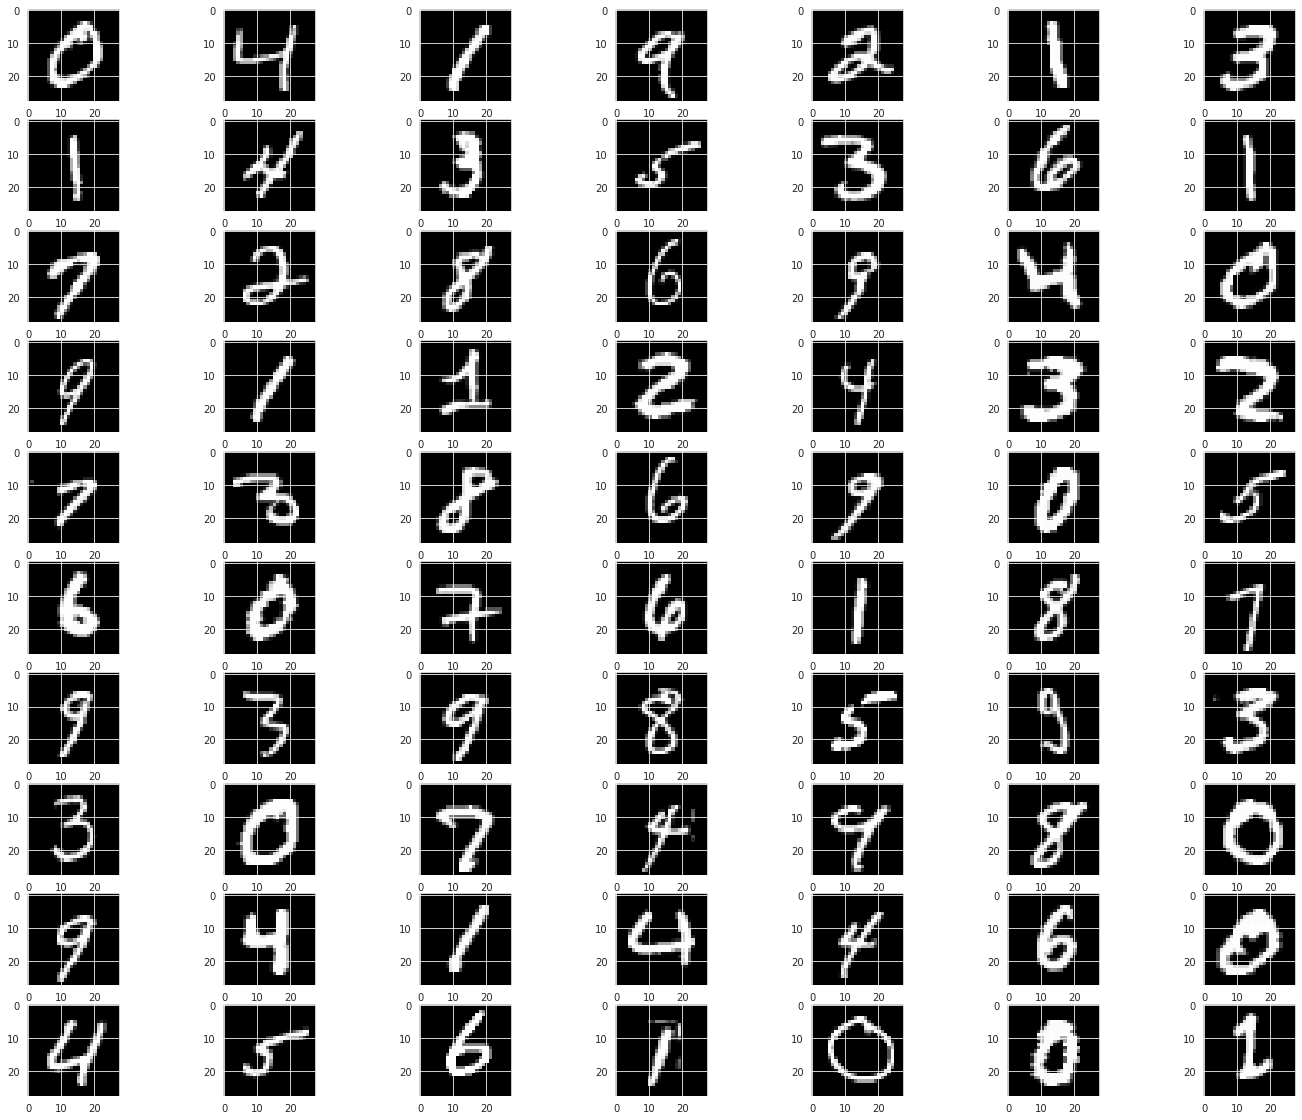

In [ ]:
sns.set_style('darkgrid')    # plt.grid()
plt.figure(6, figsize=(24, 20))

for i in range(1, 71):
    plt.subplot(10, 7, i)
    plt.imshow(x_[i].reshape((28,28)), cmap = 'gray')



In [ ]:
list(np.where(y_==1)[0])

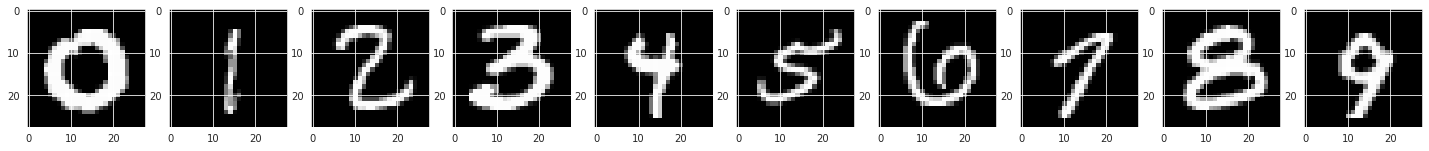

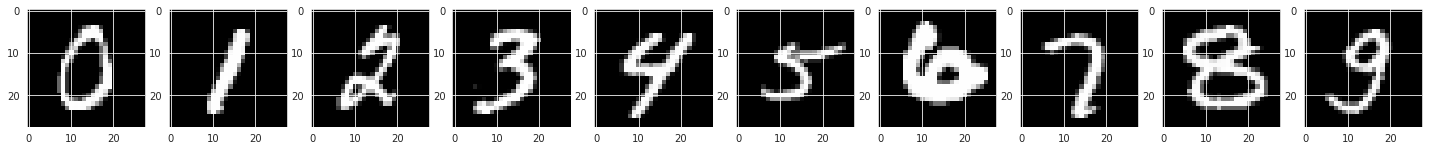

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3))     # Создаем полотно из 10 графиков
for i in range(10):                                 # Проходим по классам от 0 до 9
  ls_ind = np.where(y_org==i)[0]                       # Получаем список из индексов положений класса i в y_train
  ind = random.choice(ls_ind)                       # Случайным образом выбираем из списка индекс
  img = x_org[ind]                                     # Выбираем из x_train(ОБУЧЕНИЯ) нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray')  # Отображаем изображение i-ым графиков

plt.show()
# Выводим еще раз
fig, axs = plt.subplots(1, 10, figsize=(25, 3))     # Создаем полотно из 10 графиков
for i in range(10):                                 # Проходим по классам от 0 до 9
  ls_ind = np.where(y_org==i)[0]                       # Получаем список из индексов положений класса i в y_train
  ind = random.choice(ls_ind)                       # Случайным образом выбираем из списка индекс
  img = x_org[ind]                                     # Выбираем из x_train(ОБУЧЕНИЯ) нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray')  # Отображаем изображение i-ым графиков

plt.show()